In [1]:
import time
import numpy as np
from copy import copy
# from flatland.envs.observations import TreeObsForRailEnv
from observations import TreeObsForRailEnvAug
# First of all we import the Flatland rail environment
from rail_env import RailEnv
# from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.schedule_generators import sparse_schedule_generator
# We also include a renderer because we want to visualize what is going on in the environment
from flatland.utils.rendertools import RenderTool, AgentRenderVariant
from flatland.envs.malfunction_generators import malfunction_from_params


In [2]:
width = 100  # With of map
height = 100  # Height of map
nr_trains = 50  # Number of trains that have an assigned task in the env
cities_in_map = 20  # Number of cities where agents can start or end
seed = 14  # Random seed
NUMBER_OF_AGENTS = 10
grid_distribution_of_cities = False  # Type of city distribution, if False cities are randomly placed
max_rails_between_cities = 2  # Max number of tracks allowed between cities. This is number of entry point to a city
max_rail_in_cities = 6  # Max number of parallel tracks within a city, representing a realistic trainstation


In [3]:
rail_generator = sparse_rail_generator(max_num_cities=cities_in_map,
                                       seed=seed,
                                       grid_mode=grid_distribution_of_cities,
                                       max_rails_between_cities=max_rails_between_cities,
                                       max_rails_in_city=max_rail_in_cities,
                                       )

In [4]:
# The schedule generator can make very basic schedules with a start point, end point and a speed profile for each agent.
# The speed profiles can be adjusted directly as well as shown later on. We start by introducing a statistical
# distribution of speed profiles

# Different agent types (trains) with different speeds.
speed_ration_map = {1.: 0.25,  # Fast passenger train
                    1. / 2.: 0.25,  # Fast freight train
                    1. / 3.: 0.25,  # Slow commuter train
                    1. / 4.: 0.25}  # Slow freight train

In [5]:
# We can now initiate the schedule generator with the given speed profiles

schedule_generator = sparse_schedule_generator(speed_ration_map)

In [6]:
# We can furthermore pass stochastic data to the RailEnv constructor which will allow for stochastic malfunctions
# during an episode.

stochastic_data = {'prop_malfunction': 0.3,  # Percentage of defective agents
                   'malfunction_rate': 30,  # Rate of malfunction occurence
                   'min_duration': 3,  # Minimal duration of malfunction
                   'max_duration': 20  # Max duration of malfunction
                   }

In [7]:
# Tree predictor
max_depth = 3
observation_builder = TreeObsForRailEnvAug(max_depth=max_depth)

In [8]:
# Custom observation builder with predictor, uncomment line below if you want to try this one
# observation_builder = TreeObsForRailEnv(max_depth=2, predictor=ShortestPathPredictorForRailEnv())

# Construct the enviornment with the given observation, generataors, predictors, and stochastic data
env = RailEnv(width=width,
                 height=height,
                 rail_generator=rail_generator,
                 schedule_generator=schedule_generator,
                 number_of_agents=nr_trains,
                 malfunction_generator_and_process_data=malfunction_from_params(stochastic_data),
                 obs_builder_object=observation_builder,
                 remove_agents_at_target=True  # Removes agents at the end of their journey to make space for others
                )


In [9]:
def my_controller():
    """
    You are supposed to write this controller
    """
    _action = {}
    for _idx in range(NUMBER_OF_AGENTS):
        _action[_idx] = np.random.randint(0, 5)
    return _action

In [10]:
_, _ = env.reset()

In [11]:
# # Initiate the renderer
# env_renderer = RenderTool(env, gl="PILSVG",
#                           agent_render_variant=AgentRenderVariant.AGENT_SHOWS_OPTIONS_AND_BOX,
#                           show_debug=False,
#                           screen_height=1080,  # Adjust these parameters to fit your resolution
#                           screen_width=1920)  # Adjust these parameters to fit your resolution

# for step in range(100):

#     _action = my_controller()
#     obs, all_rewards, done, info = env.step(_action)
#     #print("Rewards: {}, [done={}]".format( all_rewards, done))
#     env_renderer.render_env(show=True, frames=False, show_observations=False)
#     time.sleep(0.3)

In [12]:
_action = my_controller()
obs, all_rewards, done, info = env.step(_action)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

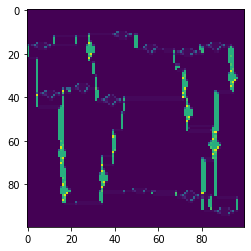

In [14]:
plt.imshow(env.rail.grid)

In [15]:
# (x - 1)*w + y Northern neighbor
# x * w + y + 1 Eastern neighbor
# (x + 1)*w + y Southern neighbor
# x * w + y - 1 Western neighbor

def get_neighbors(ft, x, y, w):
    neighbors = set()
    if ft[0] == '1':
        neighbors |= {(x - 1)*w + y}
    if ft[1] == '1':
        neighbors |= {x * w + y + 1}
    if ft[2] == '1':
        neighbors |= {(x + 1)*w + y}
    if ft[3] == '1':
        neighbors |= {x * w + y - 1}
    if ft[4] == '1':
        neighbors |= {(x - 1)*w + y}
    if ft[5] == '1':
        neighbors |= {x * w + y + 1}
    if ft[6] == '1':
        neighbors |= {(x + 1)*w + y}
    if ft[7] == '1':
        neighbors |= {x * w + y - 1}
    if ft[8] == '1':
        neighbors |= {(x - 1)*w + y}
    if ft[9] == '1':
        neighbors |= {x * w + y + 1}
    if ft[10] == '1':
        neighbors |= {(x + 1)*w + y}
    if ft[11] == '1':
        neighbors |= {x * w + y - 1}
    if ft[12] == '1':
        neighbors |= {(x - 1)*w + y}
    if ft[13] == '1':
        neighbors |= {x * w + y + 1}
    if ft[14] == '1':
        neighbors |= {(x + 1)*w + y}
    if ft[15] == '1':
        neighbors |= {x * w + y - 1}
    return neighbors
    

In [15]:
uninteresting_transitions_bin = ['0000000000000000',
                                 '1000000000100000',
                                 '0000010000000001',
                                 '0000100000010000',
                                 '0000000001001000',
                                 '0001001000000000',
                                 '0100000000000010'
                                ]
uninteresting_transitions_int = [int(t, 2) for t in uninteresting_transitions_bin]
uninteresting_transitions_int

[0, 32800, 1025, 2064, 72, 4608, 16386]

In [16]:
from scipy.sparse import csr_matrix

# connection matrix
cnnx_mat = csr_matrix((env.width*env.height, env.width*env.height), dtype=np.int8)

# transition vector
trans_vec = np.zeros(env.width*env.height, dtype=np.int32)

for x in range(env.height):
    for y in range(env.width):
        i = x*env.width + y
        
        # 16-bit integer transition
        int_t = env.rail.get_full_transitions(x,y)
        
        # binary transition
        bin_t = '{0:016b}'.format(int_t)
        
        # connections
        nghbrs = get_neighbors(bin_t, x, y, env.width)
        for n in nghbrs:
            cnnx_mat[i, n] = 1
            
        trans_vec[i] = int_t


C:\Users\evbruh\Anaconda3\lib\site-packages\scipy\sparse\_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


### Switches mask

In [17]:
switches_mask = (np.in1d(trans_vec, uninteresting_transitions_int) + 1)%2
switches_mask

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Unidirectional mask

In [18]:
unidir_mask = np.in1d(trans_vec, uninteresting_transitions_int[1:])+0
unidir_mask

array([0, 0, 0, ..., 0, 0, 0])

### Distance matrix

In [19]:
from scipy.sparse.csgraph import shortest_path
dist_mat = shortest_path(cnnx_mat, directed = True)
dist_mat[dist_mat == np.inf] = -np.inf
null_cells = np.where(np.amax(dist_mat, axis=1) == 0)[0]
dist_mat[null_cells, null_cells] = -np.inf
dist_mat[dist_mat == -np.inf] = np.inf
dist_mat

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

### Agent positions and directions vectors

In [20]:
agents_pos = np.zeros(env.width*env.height) 
for _idx in range(NUMBER_OF_AGENTS):
    p = env.agents[_idx].position
    if p is not None:
        py, px = p
    else:
        py, px = env.agents[_idx].initial_position
    i = py*env.width + px
    agents_pos[i] += 1

In [16]:
# Observation radius
RAD = 5

In [22]:
agents_dists = dist_mat[agents_pos.nonzero()[0], :]
agents_dists.shape

(9, 10000)

In [23]:
row_mask = ((switches_mask + agents_pos)>0).astype('float64')
row_mask[row_mask == 0] = np.inf

events_mask = ((agents_dists*row_mask)<RAD+1).astype('float64')
events_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

To classify switch types (left, straight, right) from an agent's perpesective, depending on agent's orientation (North, East, South, West) all switch information is embedded in 16-bit binary string. If agent is facing North, the only relevant information is in the first 4 bits. Need to permute trailing 12 bits, classify the left, straight, and right turns, then encode to 16-bit integers.

In [24]:
from collections import deque
d = deque('0001')
print(d, ''.join(list(d)))
d.rotate(1)
print(d, ''.join(list(d)))

deque(['0', '0', '0', '1']) 0001
deque(['1', '0', '0', '0']) 1000


In [27]:
from itertools import product
switch_types = dict()
orientations = [0, 1, 2, 3] # North, East, South, West respectively.
_dirs = ['F', 'R', 'B', 'L']
b_perms_4 = [''.join(str(b) for b in p) for p in list(product([0,1],repeat=4))]
# Not efficient, but small and only needs to be constructed once.
for o in orientations:
    switch_types[o] = dict()
    for sc in _dirs:
        switch_types[o][sc] = []
for p in b_perms_4:
    for i, b in enumerate(p):
        if b == '1':
            scs = deque(_dirs)
            scs.rotate(-i)
            for j in np.arange(i, i + 4)%4:
                o = orientations[j]
                sc = scs[-j]
                switch_types[o][sc].append(p)
switch_types

{0: {'F': ['1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111'],
  'R': ['0100', '0101', '0110', '0111', '1100', '1101', '1110', '1111'],
  'B': ['0010', '0011', '0110', '0111', '1010', '1011', '1110', '1111'],
  'L': ['0001', '0011', '0101', '0111', '1001', '1011', '1101', '1111']},
 1: {'F': ['0100', '0101', '0110', '0111', '1100', '1101', '1110', '1111'],
  'R': ['0010', '0011', '0110', '0111', '1010', '1011', '1110', '1111'],
  'B': ['0001', '0011', '0101', '0111', '1001', '1011', '1101', '1111'],
  'L': ['1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']},
 2: {'F': ['0010', '0011', '0110', '0111', '1010', '1011', '1110', '1111'],
  'R': ['0001', '0011', '0101', '0111', '1001', '1011', '1101', '1111'],
  'B': ['1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111'],
  'L': ['0100', '0101', '0110', '0111', '1100', '1101', '1110', '1111']},
 3: {'F': ['0001', '0011', '0101', '0111', '1001', '1011', '1101', '1111'],
  'R': ['1000', '1001', '1010', '101

In [28]:
b_perms_12 = [''.join(str(b) for b in p) for p in list(product([0,1],repeat=12))]

for i, o in enumerate(orientations):
    
    for sc in _dirs:
    
        a = switch_types[o][sc]

        cp = [''.join(el) for el in list(product(a, b_perms_12))]
        
        for j, el in enumerate(cp):
            
            bin_t = deque(el)
            
            bin_t.rotate(i*4)
            
            bin_t_r = ''.join(bin_t)
            
            int_t = int(bin_t_r, 2)
            
            cp[j] = int_t
            
        switch_types[o][sc] = cp
            
            

In [29]:
agent_num = np.random.choice(np.arange(NUMBER_OF_AGENTS))
agent_num, env.agents[agent_num], env.agents[agent_num].initial_direction
py, px = env.agents[agent_num].initial_position
dir_ = env.agents[agent_num].initial_direction
i = py*env.width + px
p_dist_mask = (dist_mat[i]<(10+1))
env_shape = (env.height, env.width)
(py, px), dir_
# switch_types[dir_]['straight']

((84, 51), 1)

In [30]:
track_feats = np.zeros((2*RAD+1, 2*RAD+1, 6))

### Parallel switches from Agent's perspective

In [31]:
inds = (switches_mask*p_dist_mask*np.in1d(trans_vec, switch_types[dir_]['F'])).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        track_feats[y, x, 0] = 1

### Parallel non-switches from Agent's perspective

In [32]:
inds = (unidir_mask*p_dist_mask*np.in1d(trans_vec, switch_types[dir_]['F'])).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        track_feats[y, x, 3] = 1

### Right Switches from Agent's perspective

In [33]:
inds = (switches_mask*p_dist_mask*np.in1d(trans_vec, switch_types[dir_]['R'])).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        track_feats[y, x, 1] = 1

### Right non-switches from Agent's perspective

In [34]:
inds = (unidir_mask*p_dist_mask*np.in1d(trans_vec, switch_types[dir_]['R'])).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        track_feats[y, x, 4] = 1

### Left switches from Agent's perspective

In [35]:
inds = (switches_mask*p_dist_mask*np.in1d(trans_vec, switch_types[dir_]['L'])).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        track_feats[y, x, 2] = 1

### Left non-switches from Agent's perspective

In [36]:
inds = (unidir_mask*p_dist_mask*np.in1d(trans_vec, switch_types[dir_]['L'])).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        track_feats[y, x, 5] = 1

### RGB color map of switches from Agent's perspective

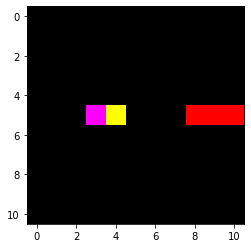

In [37]:
plt.imshow(track_feats[:, :, :3])

### RGB color map of non-switches from Agent's perspective

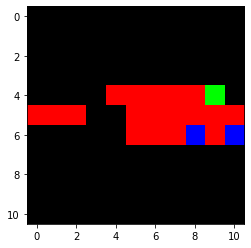

In [38]:
plt.imshow(track_feats[:, :, 3:])

### Other Agent's from Agent's perspective

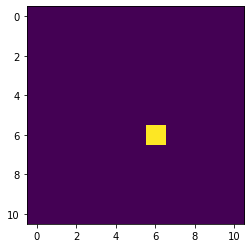

In [39]:
other_agents = np.zeros((2*RAD+1, 2*RAD+1, 1))
agents_pos_c = copy(agents_pos)
agents_pos_c[i] -= 1
inds = (p_dist_mask*agents_pos_c).nonzero()[0]
ys, xs = np.unravel_index(inds, env_shape)
for y, x in zip(ys-py+RAD+1, xs-px+RAD+1):
    if y < 2*RAD+1 and x < 2*RAD+1:
        other_agents[y, x, 0] = 1
plt.imshow(other_agents[:, :, 0])

In [40]:
all_feats = ['dist_own_target_encountered',
                'own_target_encountered_pos',
                'dist_other_target_encountered',
                'other_target_encountered_pos',
                'dist_other_agent_encountered',
                'other_agent_encountered_pos',
                'dist_potential_conflict',
                'potential_conflict_pos',
                'dist_unusable_switch',
                'unusable_switch_pos',
                'dist_to_next_branch',
                'next_branch_pos',
                'dist_min_to_target',
                'num_agents_same_direction',
                'other_agent_same_direction_pos',
                'num_agents_opposite_direction',
                'other_agent_opposite_direction_pos',
                'num_agents_malfunctioning',
                'malfunctioning_agent_pos',
                'speed_min_fractional',
                'other_agent_slower_pos',
                'other_agent_same_speed_pos',
                'other_agent_faster_pos',
                'num_agents_ready_to_depart',
             
                'other_agent_ready_to_depart_encountered_pos',
                'childs'
            ]

geo_feats = ['own_target_encountered_pos',
                'other_target_encountered_pos',
                'other_agent_encountered_pos',
                'potential_conflict_pos',
                'unusable_switch_pos',
                'next_branch_pos',
                'other_agent_same_direction_pos',
                'other_agent_opposite_direction_pos',
                'malfunctioning_agent_pos',
                'other_agent_slower_pos',
                'other_agent_same_speed_pos',
                'other_agent_faster_pos',
                'other_agent_ready_to_depart_encountered_pos'
               ]

geo_feat_inds = np.in1d(all_feats, geo_feats).nonzero()[0]

### Depth Search to build Feature Maps from Shortest Path

In [ ]:
start_ = time.time()
n_ch = 15
tree_feats = np.zeros((2*RAD+1, 2*RAD+1, n_ch*max_depth))
_shortest_path = []
cy, cx = env.agents[agent_num].initial_position
node = env.obs_dict[agent_num]
exploring = True
depth = 0
while exploring:
    _dist_min_to_target_best = np.inf
    _dir_best = None
    for d in _dirs:
        if node.childs == {}:
            exploring = False
            break
        if node.childs[d] == -np.inf:
            continue
        _dist_min_to_target = np.abs(node.childs[d].dist_min_to_target)
        if _dist_min_to_target <= _dist_min_to_target_best:
            _dist_min_to_target_best = _dist_min_to_target
            _dir_best = d
    if exploring:
        _shortest_path.append(_dir_best)
        for ch, fid in enumerate(geo_feat_inds):
            if node.childs[_dir_best][fid] is None:
                continue
            for (dist_, (py, px)) in node.childs[_dir_best][fid]:
                print((dist_, (py, px)))
                if dist_ <= 2*RAD+1:
                    y, x = py-cy+RAD+1, px-cx+RAD+1
                    if y < 2*RAD+1 and x < 2*RAD + 1:
                        tree_feats[y, x, n_ch * depth + ch] = 1 
        node = node.childs[_dir_best]
        depth += 1
end_ = time.time()
print(end_-start_)


In [ ]:
f_maps = np.dstack((track_feats, other_agents, tree_feats))          
                    